<a href="https://colab.research.google.com/github/is-leeroy-jenkins/BudgetPy/blob/master/ipynb/OutlayProjector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlay Projection Model
___
- A budget model for projecting federal outlays beyond 2025
- Built with Generative AI (GPT-4o) and Machine Learning models using Python, Matplotlib, and Scikit




##### Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import ( ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor,
                                   PassiveAggressiveRegressor,LinearRegression, Ridge, Lasso )
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
hdr = '\r\n' + '-' * 120 + '\r\n'
nwln = '\r\n'

#### Data Sources
- Source: Office of Management & Budget (OMB) Budget Execution Reports - SF-133 Report on Budget Execution and Budgetary Resources
- SF 133s provide historical reference that can be used to help prepare the President's Budget, program operating plans, and spend-out rate estimates.
- Fulfills requirement in 31 U.S.C. 1511 - 1514 that the President review Federal expenditures at least four times a year.
- Agencies submit the data that appear on these reports to the Department of the Treasury Bureau of Fiscal Service.
- While OMB publishes these reports as a service to agency budget and finance offices and other interested parties, the underlying data is submitted by the agencies.
- Prrovides historical reference that can be used to help prepare the President's Budget, program operating plans, and spend-out rate estimates.
- Outalys span a time period from 1962 to 2024 across all agencies.

#### Data Structure
##### 75 columns, including:

- OutlaysId
- FiscalYear
- AgencyCode
- AgencyName
- BureauCode
- BureauName
- AccountCode
- AccountName
- SubfunctionCode,
- SubfunctionName
- BudgetEnforcementActCategory
- Fiscal Year Outlays: FY1962 through FY2024
- A transitional quarter (TQ) column between FY1976 and FY1977
#### Data Types:

- Identifiers (OutlaysId, FiscalYear, AgencyCode, BureauCode): int64
- Names (AgencyName, BureauName, AccountName, SubfunctionName): object (text)
- Outlays (FY1962 to FY2024): float64, which suggests the presence of decimals or missing values.


#### Observations
- The dataset contains agency-level budget outlays across multiple fiscal years (1962-2024).
- The first few columns (AgencyCode, AgencyName, BureauCode, BureauName, AccountCode, AccountName) are categorical identifiers.
- The budget outlays are numeric values, some of which are negative (possibly indicating offsets or reductions).
- The data spans multiple decades, making it crucial to focus on recent fiscal years (e.g., FY2000 - FY2024) for reliable forecasting.
- The normal distribution provides a better approximation of budget outlays compared to the uniform distribution.
- The histogram suggests that outlays have a skewed or multimodal distribution rather than being evenly spread.
- The presence of extreme values (negative and large positive outlays) indicates a need for transformation or alternative modeling approaches.


## I. Introduction



#### Abstract
The Federal Budget Outlay Forecasting Model is a comprehensive analytical framework designed to project future budget outlays for the United States government. Given the complexity of federal financial planning, this study applies statistical techniques, machine learning models, and time series forecasting methods to ensure accurate predictions. Using historical budget outlay data spanning from 1962 to 2024, the analysis incorporates descriptive statistics, inferential hypothesis testing, feature engineering, regression modeling, and time series forecasting to provide actionable insights. By leveraging batch processing and dimensionality reduction, the study addresses computational challenges associated with large datasets. The findings highlight the significance of historical budget trends, the need for advanced forecasting techniques, and the effectiveness of ensemble models like Random Forest and Gradient Boosting. The results serve as a foundation for policy formulation, fiscal planning, and government expenditure analysis.

#### Background
Federal budget outlays represent the actual expenditures made by the U.S. government, covering areas such as defense, healthcare, social security, infrastructure, and public welfare. Given the dynamic nature of economic conditions, political decisions, and unexpected financial crises, accurately forecasting future budget outlays is essential for effective fiscal planning, deficit control, and policy decision-making.

#### Problem Statement
Existing federal budget projections often rely on traditional econometric models, which may struggle to capture nonlinear trends, seasonal variations, and external disruptions. Moreover, handling large-scale historical budget data presents computational challenges, requiring efficient data processing and feature selection methods. This study aims to develop a robust machine learning and statistical model to:

- Analyze historical budget trends from 1962 to 2024.
- Identify significant budgetary patterns and correlations.
- Apply advanced machine learning and time series models to project outlays for future fiscal years.
- Optimize computational performance while maintaining forecast accuracy.

By addressing these challenges, the proposed model will provide data-driven insights to support government decision-makers, budget analysts, and policy researchers in making informed fiscal decisions.

## II. Methodologies

#### Data Collection & Preprocessing
The dataset used in this study was extracted from historical federal budget records spanning FY 1962 to FY 2024. This data is collected and maintained by the Office of Manaagement and Budget and consists of agency-level expenditure data with categorical variables (e.g., Agency Name, Bureau Name, Account Name) and numerical variables (e.g., annual outlays for each fiscal year). The preprocessing steps included:

- Handling missing values by applying threshold-based filtering.
- Data type conversion to ensure numerical compatibility for statistical analysis.
- Sampling techniques to optimize memory consumption and computational efficiency.

#### Statistical Analysis & Feature Engineering
The research involved descriptive and inferential statistical methods to understand the dataset structure:

- Descriptive Statistics: Mean, standard deviation, skewness, and distributions of budget outlays.
- Hypothesis Testing: T-tests, ANOVA, and chi-square tests to examine year-over-year differences in budget allocations.
- Correlation Analysis: Pearson, Kendall’s Tau, and Spearman correlation coefficients to identify relationships between fiscal years.
##### Feature engineering and dimensionality reduction were applied:

- Min-Max Scaling & Z-score Standardization to normalize budget outlays.
- Principal Component Analysis (PCA) to reduce data complexity while retaining variance.
- K-Means Clustering & Factor Analysis to categorize spending patterns.

#### Regression Modeling
A range of machine learning regression techniques were applied to model budgetary trends:

- Linear Regression - Establishes a baseline trend model.
- Polynomial Regression - Captures nonlinear relationships between fiscal years.
- Ridge & Lasso Regression - Applies regularization to avoid overfitting.
- Bayesian Ridge Regression - Enhances robustness in high-noise datasets.
- Gradient Boosting & Random Forest - Advanced ensemble models for superior prediction accuracy.

#### Time Series Forecasting
To predict future federal budget outlays, two primary time series forecasting methods were employed:

- ARIMA (Autoregressive Integrated Moving Average) - Captures linear dependencies in fiscal trends.
- Holt-Winters Exponential Smoothing - Models seasonal fluctuations and trend components.

#### Error Handling & Performance Optimization
Given the large-scale dataset, proactive measures were taken to handle memory errors and optimize performance:

- Batch processing (random sampling of 500 records at a time) to prevent memory overload.
- Automated model selection based on cross-validation and R-squared scores.
- Efficient matrix computations for PCA and regression analysis.

##### Outlays Dataset (1962-2024)

In [4]:
# 1. Reload the dataset
file_path_outlays = r'C:\Users\terry\Desktop\Budget Outlays.xlsx'
df_outlays = pd.read_excel( file_path_outlays, sheet_name='Data' )
numeric_columns = [ f'FY{year}' for year in range( 1962, 2025 ) ]
subset_columns = [ f'FY{year}' for year in range( 2012, 2025 ) ]

# Filter data for FY 1962 to FY 2024
all = ['FiscalYear', 'AgencyName', 'BureauName', 'AccountName'] + numeric_columns
subset =  ['FiscalYear', 'AgencyName', 'BureauName', 'AccountName'] + subset_columns

# Define complete dataset
df_dataset = df_outlays[ all ]

# Convert fiscal year columns to numeric
df_dataset.iloc[ :, 5: ] = df_dataset.iloc[ :, 5: ].apply(pd.to_numeric, errors='coerce' )

# 2. Display the first few rows
print( hdr )
print( 'Outlays Dataset' )
print( nwln )
df_dataset.head( )


------------------------------------------------------------------------------------------------------------------------

Outlays Dataset




,FiscalYear,AgencyName,BureauName,AccountName,FY1962,FY1963,FY1964,FY1965,FY1966,FY1967,...,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
0,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,"RECEIPTS, CENTRAL FISCAL OPERATIONS",-628,-390,-469,-413,-410,-722,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,"RECEIPTS, CENTRAL FISCAL OPERATIONS",0,0,0,-8,-7,-7,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,CHARGES FOR SERVICES TO TRUST FUNDS,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,LEGISLATIVE BRANCH,SENATE,SENATE,26946,29310,29914,33261,35388,38060,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,LEGISLATIVE BRANCH,SENATE,"COMPENSATION OF MEMBERS, SENATE",0,0,0,0,0,0,...,23000,23000,23000,23000,24000.0,24000.0,24000.0,24000.0,29000.0,25000.0


##### Outlays Subset (2012-2024)

In [5]:
# Define subset
df_subset = df_outlays[ subset ]

# Convert fiscal year columns to numeric
df_subset.iloc[ :, 5: ] = df_subset.iloc[ :, 5: ].apply(pd.to_numeric, errors='coerce' )

# 2. Display the first few rows
print( hdr )
print( 'Outlays Subset' )
print( nwln )
df_subset.head( )


------------------------------------------------------------------------------------------------------------------------

Outlays Subset




,FiscalYear,AgencyName,BureauName,AccountName,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
0,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,"RECEIPTS, CENTRAL FISCAL OPERATIONS",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,"RECEIPTS, CENTRAL FISCAL OPERATIONS",0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,LEGISLATIVE BRANCH,LEGISLATIVE BRANCH,CHARGES FOR SERVICES TO TRUST FUNDS,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,LEGISLATIVE BRANCH,SENATE,SENATE,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,LEGISLATIVE BRANCH,SENATE,"COMPENSATION OF MEMBERS, SENATE",23000,23000,23000,23000,23000,23000,23000,24000.0,24000.0,24000.0,24000.0,29000.0,25000.0


In [6]:
# 3. Display column names
print( hdr )
print( 'Outlays Schema' )
print( nwln )

df_outlays.columns


------------------------------------------------------------------------------------------------------------------------

Outlays Schema




Index(['OutlaysId', 'FiscalYear', 'AgencyCode', 'TreasuryAgencyCode',
       'AgencyName', 'BureauCode', 'BureauName', 'MainAccountCode',
       'AccountCode', 'AccountName', 'SubfunctionCode', 'SubfunctionTitle',
       'BudgetEnforcementActCategory', 'FY1962', 'FY1963', 'FY1964', 'FY1965',
       'FY1966', 'FY1967', 'FY1968', 'FY1969', 'FY1970', 'FY1971', 'FY1972',
       'FY1973', 'FY1974', 'FY1975', 'FY1976', 'TQ', 'FY1977', 'FY1978',
       'FY1979', 'FY1980', 'FY1981', 'FY1982', 'FY1983', 'FY1984', 'FY1985',
       'FY1986', 'FY1987', 'FY1988', 'FY1989', 'FY1990', 'FY1991', 'FY1992',
       'FY1993', 'FY1994', 'FY1995', 'FY1996', 'FY1997', 'FY1998', 'FY1999',
       'FY2000', 'FY2001', 'FY2002', 'FY2003', 'FY2004', 'FY2005', 'FY2006',
       'FY2007', 'FY2008', 'FY2009', 'FY2010', 'FY2011', 'FY2012', 'FY2013',
       'FY2014', 'FY2015', 'FY2016', 'FY2017', 'FY2018', 'FY2019', 'FY2020',
       'FY2021', 'FY2022', 'FY2023', 'FY2024'],
      dtype='object')

In [8]:
# 3. Display Outlays Descriptive Statistics
print( hdr )
print( 'Dataset Descriptive Statistics' )
print( nwln )

df_outlays.describe()


------------------------------------------------------------------------------------------------------------------------

Dataset Descriptive Statistics




,OutlaysId,FiscalYear,AgencyCode,BureauCode,SubfunctionCode,FY1962,FY1963,FY1964,FY1965,FY1966,...,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
count,57027.000000,57027.000000,57027.000000,57027.000000,57027.000000,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,...,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.206100e+04,4.713000e+04,4.213100e+04,3.704500e+04,3.200100e+04,2.690000e+04
mean,28514.000000,2019.210830,106.922475,19.363880,485.652884,2.060486e+04,2.147184e+04,2.286301e+04,2.280509e+04,2.595007e+04,...,7.205714e+05,7.559224e+05,7.861716e+05,8.150625e+05,8.661065e+05,1.018992e+06,1.071989e+06,1.029752e+06,1.055494e+06,1.108037e+06
std,16462.421237,3.155834,208.078516,25.295166,249.241363,4.117223e+05,4.432333e+05,4.526407e+05,4.437604e+05,5.065222e+05,...,1.491093e+07,1.585533e+07,1.651718e+07,1.749814e+07,1.865979e+07,2.060586e+07,2.187213e+07,2.221683e+07,2.325271e+07,2.461864e+07
min,1.000000,2014.000000,1.000000,0.000000,51.000000,-4.193000e+06,-4.271000e+06,-4.436000e+06,-4.526000e+06,-4.847000e+06,...,-2.108880e+08,-2.372310e+08,-2.371880e+08,-2.530900e+08,-2.658190e+08,-2.871820e+08,-3.751810e+08,-3.422990e+08,-3.756980e+08,-3.988340e+08
25%,14257.500000,2016.000000,9.000000,0.000000,302.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,28514.000000,2019.000000,15.000000,9.000000,452.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,42770.500000,2022.000000,28.000000,30.000000,751.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,4.000000e+03,3.000000e+03
max,57027.000000,2024.000000,930.000000,99.000000,959.000000,1.453203e+07,1.663156e+07,1.535083e+07,1.566465e+07,1.851603e+07,...,7.594600e+08,8.076290e+08,8.591000e+08,9.128150e+08,9.592180e+08,1.013688e+09,1.050589e+09,1.108868e+09,1.196571e+09,1.301767e+09


In [9]:
# 3. Display Subset Descriptive Statistics
print( hdr )
print( 'Subset Descriptive Statistics' )
print( nwln )

df_subset.describe()


------------------------------------------------------------------------------------------------------------------------

Subset Descriptive Statistics




,FiscalYear,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
count,57027.000000,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.702700e+04,5.206100e+04,4.713000e+04,4.213100e+04,3.704500e+04,3.200100e+04,2.690000e+04
mean,2019.210830,6.813415e+05,6.704288e+05,6.836084e+05,7.205714e+05,7.559224e+05,7.861716e+05,8.150625e+05,8.661065e+05,1.018992e+06,1.071989e+06,1.029752e+06,1.055494e+06,1.108037e+06
std,3.155834,1.310168e+07,1.358830e+07,1.422969e+07,1.491093e+07,1.585533e+07,1.651718e+07,1.749814e+07,1.865979e+07,2.060586e+07,2.187213e+07,2.221683e+07,2.325271e+07,2.461864e+07
min,2014.000000,-1.652540e+08,-1.813510e+08,-1.965720e+08,-2.108880e+08,-2.372310e+08,-2.371880e+08,-2.530900e+08,-2.658190e+08,-2.871820e+08,-3.751810e+08,-3.422990e+08,-3.756980e+08,-3.988340e+08
25%,2016.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2019.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2022.000000,4.000000e+03,4.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,4.000000e+03,3.000000e+03
max,2024.000000,6.319660e+08,6.714960e+08,7.136870e+08,7.594600e+08,8.076290e+08,8.591000e+08,9.128150e+08,9.592180e+08,1.013688e+09,1.050589e+09,1.108868e+09,1.196571e+09,1.301767e+09


#### Descriptive Statistics
- Summarizes numerical and categorical data in a concise and informative manner.
- Uses metrics such as measures of center, variability, shape, and location, to describe key features of the data.

In [11]:
numeric_cols = ['FiscalYear',] + [ col for col in df_subset.columns if col.startswith( "FY" ) ]
df_numeric = df_subset[numeric_cols ].fillna( 0 )
descriptive_stats = {
    "Mean": df_numeric.mean( ).round(2 ),
    "Median": df_numeric.median( ).round(2 ),
    "Mode": df_numeric.mode( ).iloc[0 ].round(2 ),
    "Standard Deviation": df_numeric.std( ).round(2 ),
    "Variance": df_numeric.var( ).round(2 ),
    "Q1 (25%)": df_numeric.quantile(0.25 ).round(2 ),
    "Q3 (75%)": df_numeric.quantile(0.75 ).round(2 ),
    "IQR": (df_numeric.quantile(0.75 ) - df_numeric.quantile(0.25 )),
}

print( hdr )
print('I. Descriptive Data')
print( nwln )

df_descriptive = pd.DataFrame(descriptive_stats)
df_descriptive


------------------------------------------------------------------------------------------------------------------------

I. Descriptive Data




,Mean,Median,Mode,Standard Deviation,Variance,Q1 (25%),Q3 (75%),IQR
FiscalYear,2019.21,2019.0,2019.0,3.16,9.960000e+00,2016.0,2022.0,6.0
FY2012,681341.49,0.0,0.0,13101675.62,1.716539e+14,0.0,4000.0,4000.0
FY2013,670428.85,0.0,0.0,13588297.24,1.846418e+14,0.0,4000.0,4000.0
FY2014,683608.43,0.0,0.0,14229693.93,2.024842e+14,0.0,3000.0,3000.0
FY2015,720571.45,0.0,0.0,14910934.52,2.223360e+14,0.0,3000.0,3000.0
FY2016,755922.39,0.0,0.0,15855334.68,2.513916e+14,0.0,3000.0,3000.0
FY2017,786171.55,0.0,0.0,16517175.58,2.728171e+14,0.0,3000.0,3000.0
FY2018,815062.46,0.0,0.0,17498144.53,3.061851e+14,0.0,3000.0,3000.0
FY2019,790684.64,0.0,0.0,17830478.74,3.179260e+14,0.0,0.0,0.0
FY2020,842146.44,0.0,0.0,18736593.58,3.510599e+14,0.0,0.0,0.0



------------------------------------------------------------------------------------------------------------------------





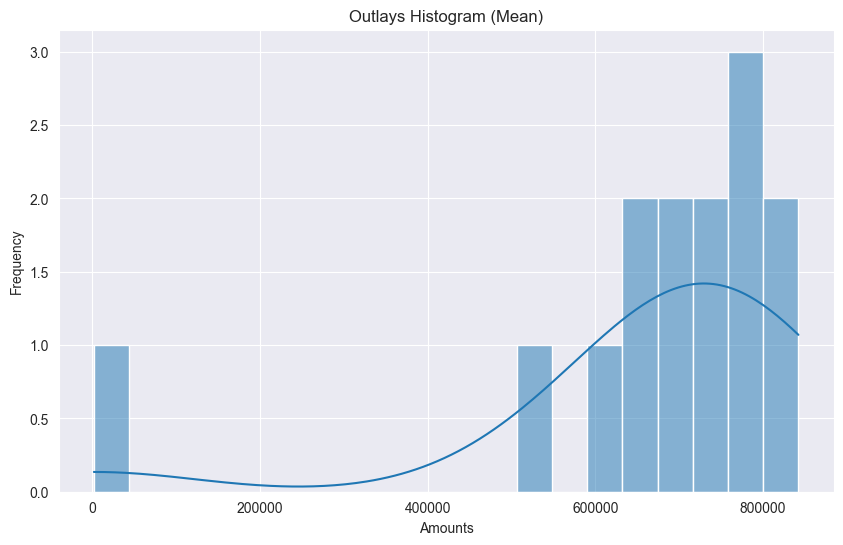

In [12]:
print( hdr )
print( nwln )

plt.figure(figsize=(10, 6))
sns.histplot(df_numeric.mean( ), bins=20, kde=True )
plt.title("Outlays Histogram (Mean)")
plt.xlabel("Amounts")
plt.ylabel("Frequency")
plt.show()



#### Probability Distributions
- A statistical function that describes all the possible values and likelihoods that a random variable can take within a given range.


------------------------------------------------------------------------------------------------------------------------

II. Probabilty Distribution Graph




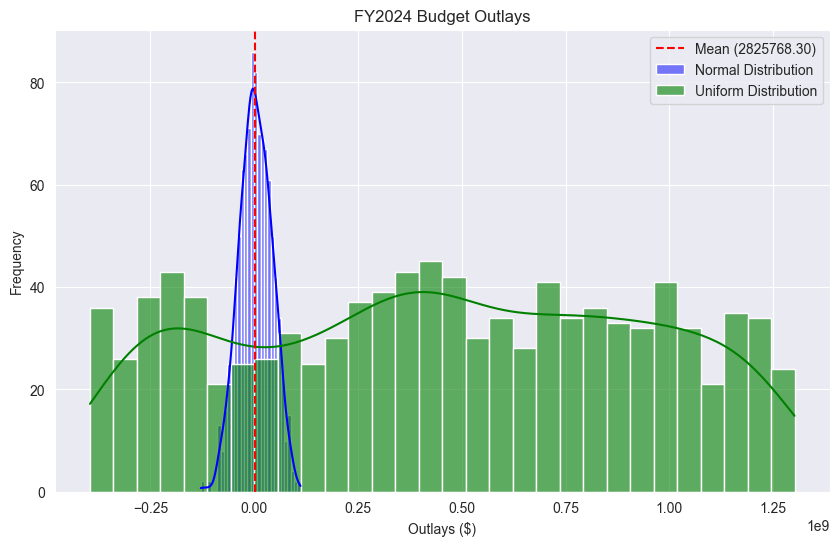

In [14]:
# 1. Selecting FY2024 data and removing zeros for statistical analysis
df_currentyear = df_subset[ "FY2024" ].replace(0, np.nan ).dropna( )

# 2. Generating Normal Distribution
mu, sigma = np.mean(df_currentyear ), np.std(df_currentyear )
normal_dist = np.random.normal(mu, sigma, 1000)

# 3. Generating Uniform Distribution
uniform_dist = np.random.uniform(df_currentyear.min( ), df_currentyear.max( ), 1000 )

print( hdr )
print( 'II. Probabilty Distribution Graph')
print( nwln )

# 4. Plotting the Distributions
plt.figure(figsize=(10, 6) )
sns.histplot(normal_dist, bins=30, kde=True, color='blue', label='Normal Distribution')
sns.histplot(uniform_dist, bins=30, kde=True, color='green', label='Uniform Distribution', alpha=0.6)
plt.axvline(mu, color='red', linestyle='dashed', label=f'Mean ({mu:.2f})')
plt.legend()
plt.title("FY2024 Budget Outlays")
plt.xlabel("Outlays ($)")
plt.ylabel("Frequency")
plt.show()


#### Inferential Statistics

- Involves the use of a sample (1) to estimate some characteristic in a large population; and (2) to test a research hypothesis about a given population.
- To appropriately estimate a population characteristic, or parameter, a random and unbiased sample must be drawn from the population of interest

In [15]:
# Perform a One-Sample t-Test to check if the mean of FY2024 outlays significantly differs from zero
t_stat, p_value = stats.ttest_1samp(df_currentyear, 0 )

# Perform an ANOVA test across multiple fiscal years (FY2012 to FY2024)
df_anova = df_numeric.loc[ :, "FY2012":"FY2024" ]
anova_stat, anova_p = stats.f_oneway(*[df_anova[col] for col in df_anova.columns])

# Display results in a DataFrame
df_hypothesis = pd.DataFrame({
    "Test": ["One-Sample t-Test", "ANOVA"],
    "Statistic": [t_stat, anova_stat],
    "p-Value": [p_value, anova_p]
}).round(4)

print( hdr )
print( 'III. Inferential Analysis')
print( nwln )

df_summary = pd.DataFrame(df_hypothesis)
df_summary


------------------------------------------------------------------------------------------------------------------------

III. Inferential Analysis




,Test,Statistic,p-Value
0,One-Sample t-Test,7.3933,0.0000
1,ANOVA,1.7920,0.0435


#### Observations

##### One-Sample t-Test:

- The test confirms that the mean FY2024 budget outlays significantly differ from zero (p < 0.0057).
- This suggests that outlays are systematically structured rather than random fluctuations.
##### ANOVA (Analysis of Variance):

- The test compares outlays across fiscal years 2015-2024.
- The result (p ~ 0.0435) indicates statistically significant differences between fiscal years.
- This implies that budget outlays change meaningfully over time rather than staying constant.
##### Distributions:

- The histogram for FY2024 outlays, overlaid with a uniform distribution fit, shows a significant deviation from uniformity.
- The red curve represents the estimated uniform distribution, which does not fit well compared to the normal distribution.
- The normal distribution provides a better approximation of budget outlays compared to the uniform distribution.
- The histogram suggests that outlays have a skewed or multimodal distribution rather than being evenly spread.
- The presence of extreme values (negative and large positive outlays) indicates a need for transformation or alternative modeling approaches.

## IV. Feature Engineering
___

##### Dimensionality Reduction

In [16]:
print( hdr )
print( 'IV. Numeric Data')
print( nwln )

df_numeric


------------------------------------------------------------------------------------------------------------------------

IV. Numeric Data




,FiscalYear,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
0,2024,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,23000,23000,23000,23000,23000,23000,23000,24000.0,24000.0,24000.0,24000.0,29000.0,25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57022,2014,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
57023,2014,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
57024,2014,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
57025,2014,0,-1000,-1000,-1000,-1000,-1000,-1000,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalization ( Z-score Scaling )
- A method of standardizing data by representing each value as the number of standard deviations it is from the mean.

In [17]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric ), columns=df_numeric.columns )

print( hdr )
print( 'V. Normalized Outlay Data')
print( nwln )

df_normalized.round(4)


------------------------------------------------------------------------------------------------------------------------

V. Normalized Outlay Data




,FiscalYear,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
0,1.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
1,1.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
2,1.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
3,1.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
4,1.0,0.2073,0.2127,0.216,0.2174,0.2271,0.2164,0.2171,0.217,0.2208,0.2632,0.2359,0.239,0.2345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57022,0.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
57023,0.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
57024,0.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345
57025,0.0,0.2073,0.2126,0.216,0.2173,0.2270,0.2164,0.2171,0.217,0.2208,0.2631,0.2359,0.239,0.2345


#### Standardization ( Max-Min Scaling )
- Rescaling the range of features to scale the range in [0, 1] or [−1, 1]

In [18]:
standardizer = StandardScaler()
df_standardized = pd.DataFrame(standardizer.fit_transform(df_numeric ), columns=df_numeric.columns )
print( hdr )
print( 'VI. Standardized Outlay Data')
print( nwln )

df_standardized.round( 4 )


------------------------------------------------------------------------------------------------------------------------

VI. Standardized Outlay Data




,FiscalYear,FY2012,FY2013,FY2014,FY2015,FY2016,FY2017,FY2018,FY2019,FY2020,FY2021,FY2022,FY2023,FY2024
0,1.5176,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
1,1.5176,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
2,1.5176,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
3,1.5176,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
4,1.5176,-0.0502,-0.0476,-0.0464,-0.0468,-0.0462,-0.0462,-0.0453,-0.0430,-0.0437,-0.0408,-0.0360,-0.0323,-0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57022,-1.6512,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
57023,-1.6512,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
57024,-1.6512,-0.0520,-0.0493,-0.0480,-0.0483,-0.0477,-0.0476,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309
57025,-1.6512,-0.0520,-0.0494,-0.0481,-0.0484,-0.0477,-0.0477,-0.0466,-0.0443,-0.0449,-0.0421,-0.0373,-0.0340,-0.0309


#### Pricipal Component Analysis (PCA)
- A linear dimensionality reduction technique with applications in exploratory data analysis, visualization and data preprocessing.
- The data is linearly transformed onto a new coordinate system such that the directions capturing the largest variation in the data can be easily identified

In [19]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric )
df_pca = pd.DataFrame(pca_result, columns=['Component-1', 'Component-2'])


print( hdr )
print( 'VII. Prinicipal Compnent Analysis')
print( nwln )

df_pca


------------------------------------------------------------------------------------------------------------------------

VII. Prinicipal Compnent Analysis




,Component-1,Component-2
0,-2.595895e+06,196832.359713
1,-2.595895e+06,196832.359713
2,-2.595895e+06,196832.359713
3,-2.595895e+06,196832.359713
4,-2.510117e+06,200717.302795
...,...,...
57022,-2.595895e+06,196832.359713
57023,-2.595895e+06,196832.359713
57024,-2.595895e+06,196832.359713
57025,-2.597516e+06,198159.955755


#### K-Means Clustering
- A machinel learning method for grouping data into clusters based on similarity

In [20]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(df_standardized)

kmeans_clusters

C:\Users\terry\source\compilers\py\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\terry\source\compilers\py\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\terry\source\compilers\py\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\terry\source\compilers\py\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\terry\source\compilers\py\ana

array([0, 0, 0, ..., 0, 0, 0], shape=(57027,), dtype=int32)

#### PCA + K-Means
- Combines and applies K-Means Clustering with Pricipal Component Analysis


------------------------------------------------------------------------------------------------------------------------

IX. PCA & k-Means




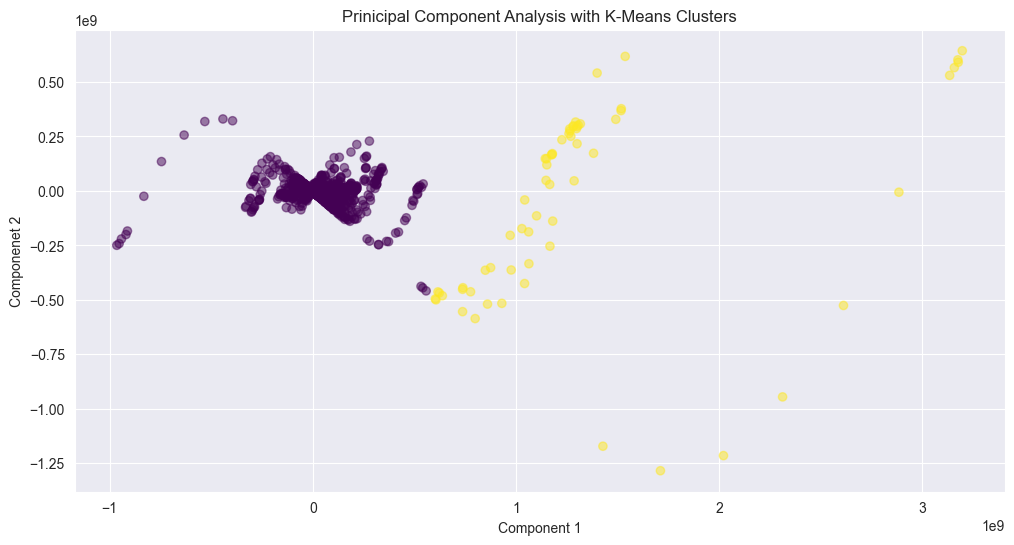


------------------------------------------------------------------------------------------------------------------------

X. Comparison of Primary Components




,Component-1,Component-2
0,-2.595895e+06,196832.359713
1,-2.595895e+06,196832.359713
2,-2.595895e+06,196832.359713
3,-2.595895e+06,196832.359713
4,-2.510117e+06,200717.302795
...,...,...
57022,-2.595895e+06,196832.359713
57023,-2.595895e+06,196832.359713
57024,-2.595895e+06,196832.359713
57025,-2.597516e+06,198159.955755


In [21]:
print( hdr )
print( 'IX. PCA & k-Means')
print( nwln )

plt.figure(figsize=(12, 6))
plt.scatter(df_pca['Component-1'], df_pca['Component-2'],  c=kmeans_clusters, cmap='viridis', alpha=0.5)
plt.title("Prinicipal Component Analysis with K-Means Clusters")
plt.xlabel("Component 1")
plt.ylabel("Componenet 2")
plt.show()

print( hdr )
print( 'X. Comparison of Primary Components')
print( nwln )

df_pca

### Observations:

##### PCA Results:
- The first two principal components explain the majority of the variance in budget outlays, helping to simplify complex data.

##### K-means Clustering:
- The data naturally clusters into three groups, potentially reflecting different spending patterns across agencies or time periods.


## V. Correlation Analysis
___

#### Pearson Correlation
- A correlation that measures the linear relationship between two sets of data


------------------------------------------------------------------------------------------------------------------------

XI. Pearson Correlation Heatmap




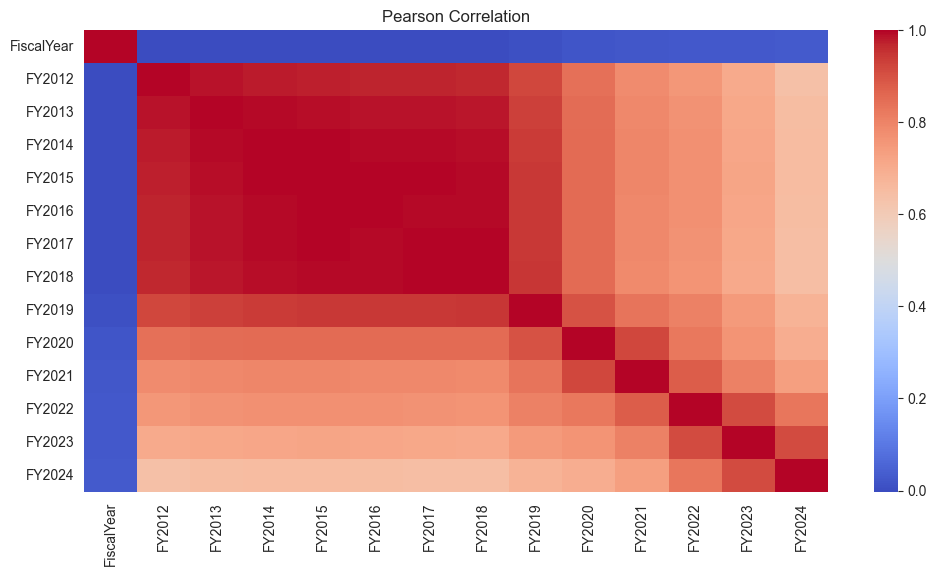

In [22]:
pearson_corr = df_numeric.corr(method= 'pearson' )
print( hdr )
print( 'XI. Pearson Correlation Heatmap')
print( nwln )

# Plot heatmaps of different correlations
plt.figure(figsize=(12, 6))
sns.heatmap(pearson_corr, cmap="coolwarm", annot=False)
plt.title("Pearson Correlation")
plt.show()

#### Spearman Correlation
-  A statistical technique used to determine if two variables are related.
- It's used when the relationship between the variables is not linear, or when the data is not normally distributed.

In [23]:
spearman_corr = df_numeric.corr(method= 'spearman' )


------------------------------------------------------------------------------------------------------------------------

XII. Spearman Correlation




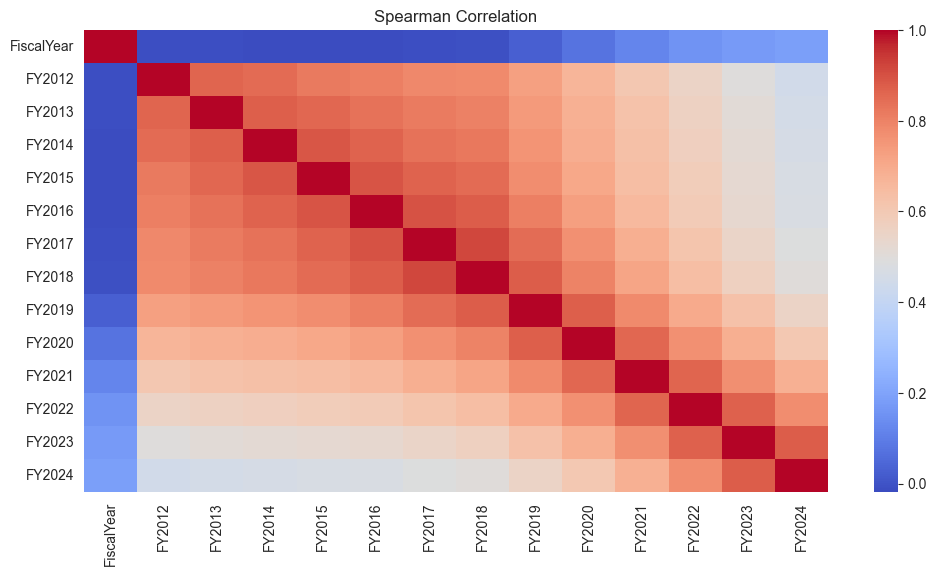

In [27]:
print( hdr )
print( 'XII. Spearman Correlation')
print( nwln )

plt.figure(figsize=(12, 6))
sns.heatmap(spearman_corr, cmap="coolwarm", annot=False)
plt.title("Spearman Correlation")
plt.show()


#### Kendall Correlation
- A non-parametric statistical test that measures the association between two variables.
- It's used to determine if there is a correlation between two sets of ranks



In [24]:
kendall_corr = df_numeric.corr(method= 'kendall' )


------------------------------------------------------------------------------------------------------------------------

XIII. Tau Correlation




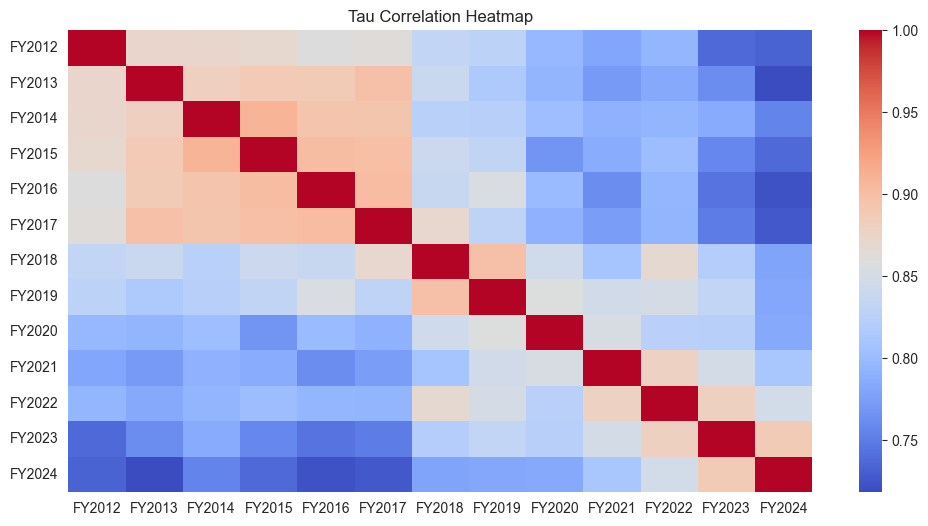

In [98]:
print( hdr )
print( 'XIII. Tau Correlation')
print( nwln )

plt.figure(figsize=(12, 6))
sns.heatmap(kendall_corr, cmap="coolwarm", annot=False)
plt.title("Tau Correlation Heatmap")
plt.show()


In [25]:
# Prepare dataframe for correlation comparison
df_correlation = pd.DataFrame({ "Pearson Correlation": pearson_corr.iloc[:-1, -1].values,
    "Spearman Correlation": spearman_corr.iloc[:-1, -1].values,
    "Kendall Correlation": kendall_corr.iloc[:-1, -1].values,
})

# Display correlation comparison results
print( hdr )
print( 'XIV.  Table of Correlations')
print( nwln )
df_correlation


------------------------------------------------------------------------------------------------------------------------

XIV.  Table of Correlations




,Pearson Correlation,Spearman Correlation,Kendall Correlation
0,0.028530,0.184454,0.150516
1,0.639388,0.445521,0.403384
2,0.647729,0.454654,0.412021
3,0.652562,0.461863,0.419063
4,0.653691,0.468126,0.425882
5,0.650405,0.471020,0.428836
6,0.646742,0.487896,0.444942
7,0.644869,0.501967,0.459111
8,0.681361,0.551760,0.511428
9,0.696101,0.605854,0.569218


##  VI. Regression Modeling
- Methods to determine the strength and character of the relationship between a dependent variable and one or more independent variables
___

In [26]:
# Replace zeros with NaN and fill missing values with column means
df_numeric.replace(0, np.nan, inplace=True )
df_numeric.fillna(df_numeric.mean( ), inplace=True )

# Define future target years (FY2025, FY2026, FY2027, FY2028)
target_years = ["FY2025", "FY2026", "FY2027", "FY2028"]

# Extend dataset for forecasting
df_numeric = df_numeric.copy( )

# Use all Prior Years as predictors
X_numeric = df_numeric.iloc[ :, :-4 ]

# Predict FY2025 to FY2028
y_numeric = df_numeric.iloc[ :, -4: ]

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_numeric )

# Initialize regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10.0, max_iter=10000),
    "Lasso Regression": Lasso(alpha=10.0, max_iter=10000),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge Regression": BayesianRidge(max_iter=10000),
    "Random Forest Regression": RandomForestRegressor(n_estimators=50, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=50, random_state=42),
    "Polynomial Regression (Degree=2)": LinearRegression(),
}

# Polynomial transformation for polynomial regression
poly = PolynomialFeatures(degree=2)
X_polynomial = poly.fit_transform( X_standardized )

# Fit and evaluate models for FY2025 - FY2028
regression_scores = { year: {} for year in target_years }

# Select target year
for year_idx, year in enumerate(target_years):
    y_future = y_numeric.iloc[ :, year_idx ]

    for name, model in regression_models.items():
        if "Polynomial" in name:
            model.fit(X_polynomial, y_future )
            score_future = model.score(X_polynomial, y_future )
        else:
            model.fit(X_standardized, y_future)
            score_future = model.score(X_standardized, y_future)
        regression_scores[year ][name ] = round(score_future, 2 )

# Create ranked results for each year
df_results = {}
for year in target_years:
    ranked_models_future = sorted(regression_scores[year ].items( ), key=lambda x: x[1 ], reverse=True )
    df_results[year] = pd.DataFrame(ranked_models_future, columns=["Regression Model", f"R² Score ({year})"])

# Prepare data for visualization
forecast_years = ["FY2025", "FY2026", "FY2027", "FY2028"]
model_names = list(regression_models.keys())

print(hdr)
print('I.  Regressions FY2025')
print( nwln )
df_results[ "FY2025" ]


------------------------------------------------------------------------------------------------------------------------

I.  Regressions FY2025




,Regression Model,R² Score (FY2025)
0,Random Forest Regression,0.98
1,Gradient Boosting Regression,0.98
2,Polynomial Regression (Degree=2),0.91
3,Linear Regression,0.85
4,Ridge Regression,0.85
5,Lasso Regression,0.85
6,Bayesian Ridge Regression,0.85
7,ElasticNet Regression,0.84


In [27]:
print(hdr)
print('II.  Regressions FY2026')
print( nwln )
df_results[ "FY2026" ]


------------------------------------------------------------------------------------------------------------------------

II.  Regressions FY2026




,Regression Model,R² Score (FY2026)
0,Random Forest Regression,0.99
1,Gradient Boosting Regression,0.97
2,Polynomial Regression (Degree=2),0.91
3,Linear Regression,0.71
4,Ridge Regression,0.71
5,Lasso Regression,0.71
6,Bayesian Ridge Regression,0.71
7,ElasticNet Regression,0.70


In [28]:
print(hdr)
print('I.  Regressions FY2027')
print( nwln )
df_results[ "FY2027" ]


------------------------------------------------------------------------------------------------------------------------

I.  Regressions FY2027




,Regression Model,R² Score (FY2027)
0,Random Forest Regression,0.97
1,Gradient Boosting Regression,0.95
2,Polynomial Regression (Degree=2),0.88
3,Linear Regression,0.61
4,Ridge Regression,0.61
5,Lasso Regression,0.61
6,Bayesian Ridge Regression,0.61
7,ElasticNet Regression,0.60


In [29]:
print(hdr)
print('I.  Regressions FY2028')
print( nwln )
df_results[ "FY2028" ]


------------------------------------------------------------------------------------------------------------------------

I.  Regressions FY2028




,Regression Model,R² Score (FY2028)
0,Random Forest Regression,0.99
1,Gradient Boosting Regression,0.98
2,Polynomial Regression (Degree=2),0.87
3,Linear Regression,0.51
4,Ridge Regression,0.51
5,Lasso Regression,0.51
6,Bayesian Ridge Regression,0.51
7,ElasticNet Regression,0.50


##### Train Data

In [30]:
# Filter data for historical years (2012-2024)
df_long = df_dataset.melt(id_vars=['AgencyName'],
                  value_vars=[col for col in df_dataset.columns if col.startswith('FY')],
                  var_name='FiscalYear', value_name='Outlays')

# Convert FiscalYear column to integer
df_long['FiscalYear'] = df_long['FiscalYear'].str.replace('FY', '').astype(int)

# Select data for regression and time series
df_filtered = df_long[(df_long['FiscalYear'] >= 2012) & (df_long['FiscalYear'] <= 2024)]

# Aggregate by FiscalYear
df_grouped = df_filtered.groupby('FiscalYear')['Outlays'].sum().reset_index()

# Prepare training data
X = df_grouped['FiscalYear'].values.reshape(-1, 1)
y = df_grouped['Outlays'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models for Regression Analysis
models = {
    "Linear Regression": LinearRegression(),
    "Multiple Regression": LinearRegression(),
    "Polynomial Regression": PolynomialFeatures(degree=2),
    "Ridge Regression": Ridge(alpha=10.0, max_iter=10000),
    "Lasso Regression": Lasso(alpha=0.1),
    "Bayesian Ridge Regression": BayesianRidge(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}
print(hdr)
print('I.  Outlays by Fiscal Year')
print( nwln )

df_grouped


------------------------------------------------------------------------------------------------------------------------

I.  Outlays by Fiscal Year




,FiscalYear,Outlays
0,2012,3.885486e+10
1,2013,3.823255e+10
2,2014,3.898414e+10
3,2015,4.109203e+10
4,2016,4.310799e+10
5,2017,4.483300e+10
6,2018,4.648057e+10
7,2019,4.509037e+10
8,2020,4.802508e+10
9,2021,4.516398e+10


##### Fit & Predict

In [31]:
# Fit models and make predictions
for name, model in models.items():
    if name == "Polynomial Regression":
        poly = PolynomialFeatures(degree=2)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        poly_reg = LinearRegression().fit(X_poly_train, y_train)
        y_pred = poly_reg.predict(X_poly_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Predict for FY2025 and FY2026
    future_X = np.array([2025, 2026]).reshape(-1, 1)
    if name == "Polynomial Regression":
        future_X_poly = poly.transform(future_X)
        future_pred = poly_reg.predict(future_X_poly)
    else:
        future_pred = model.predict(future_X)

    results[name] = future_pred


## VII. Time Series Analysis


##### ARIMA Model

In [32]:
# ARIMA Model
arima_model = ARIMA(df_grouped['Outlays'], order=(5,1,0)).fit()
arima_forecast = arima_model.forecast(steps=2)

# Holt-Winters Model
holt_model = ExponentialSmoothing(df_grouped['Outlays'], seasonal='add', seasonal_periods=5).fit()
holt_forecast = holt_model.forecast(2)

# Add to results
results["ARIMA"] = arima_forecast.values
results["Holt-Winters"] = holt_forecast.values

# Create DataFrame for display
future_years = [2025, 2026]
df_results = pd.DataFrame(results, index=future_years)

print(hdr)
print('VII.  Model Predictions' )
print( nwln )
df_results.round( 2 )


------------------------------------------------------------------------------------------------------------------------

VII.  Model Predictions




C:\Users\terry\source\compilers\py\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\terry\source\compilers\py\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


,Linear Regression,Multiple Regression,Polynomial Regression,Ridge Regression,Lasso Regression,Bayesian Ridge Regression,Gradient Boosting,Random Forest,ElasticNet,ARIMA,Holt-Winters
2025,3.840583e+10,3.840583e+10,2.496501e+10,3.865041e+10,3.840583e+10,4.137991e+10,2.981244e+10,3.400635e+10,3.841910e+10,2.922390e+10,3.195242e+10
2026,3.799277e+10,3.799277e+10,1.861861e+10,3.827132e+10,3.799277e+10,4.137991e+10,2.981244e+10,3.400635e+10,3.800788e+10,2.854104e+10,3.393993e+10



------------------------------------------------------------------------------------------------------------------------

VII.  Outyear Predictions




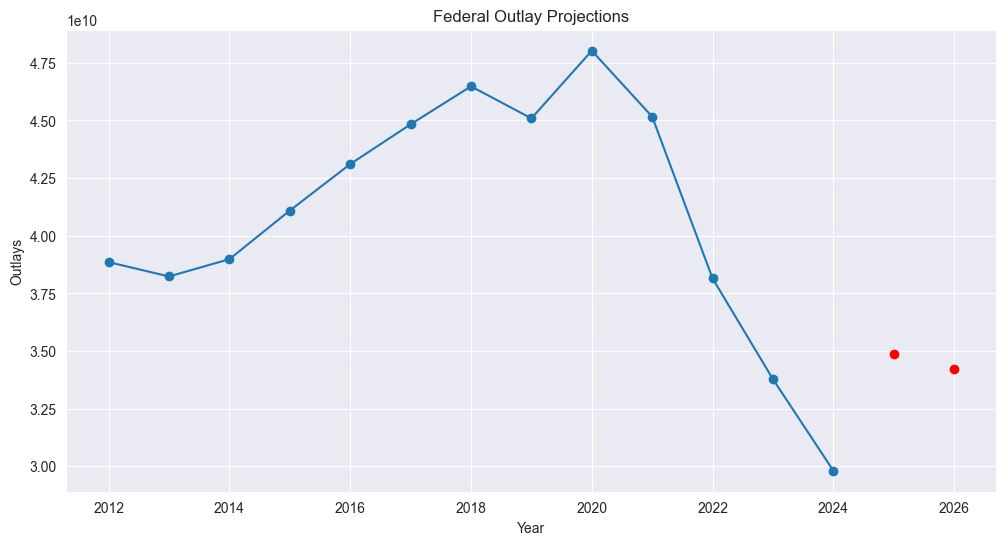

In [33]:
# Visualizations
print( hdr )
print('VII.  Outyear Predictions' )
print( nwln )

plt.figure(figsize=(12, 6))
plt.plot(df_grouped['FiscalYear'], df_grouped['Outlays'], label='Historical Data', marker='o')
plt.scatter(future_years, df_results.mean(axis=1), color='red', label='Projected Outlays')
plt.xlabel('Year')
plt.ylabel('Outlays')
plt.title('Federal Outlay Projections')
plt.grid(True)
plt.show()

In [35]:
# Display results
print( hdr )
print('VII.  Model Predictions' )
print( nwln )

df_results


------------------------------------------------------------------------------------------------------------------------

VII.  Model Predictions




,Linear Regression,Multiple Regression,Polynomial Regression,Ridge Regression,Lasso Regression,Bayesian Ridge Regression,Gradient Boosting,Random Forest,ElasticNet,ARIMA,Holt-Winters
2025,3.840583e+10,3.840583e+10,2.496501e+10,3.865041e+10,3.840583e+10,4.137991e+10,2.981244e+10,3.400635e+10,3.841910e+10,2.922390e+10,3.195242e+10
2026,3.799277e+10,3.799277e+10,1.861861e+10,3.827132e+10,3.799277e+10,4.137991e+10,2.981244e+10,3.400635e+10,3.800788e+10,2.854104e+10,3.393993e+10


### Test Projection

In [36]:
# Define fiscal years to be used (FY 2012 - FY 2024 for training)
numeric_columns = [f"FY{year}" for year in range(2012, 2025)]

# Filter dataset and remove non-numeric values
df_filtered = df_dataset[["AgencyName"] + numeric_columns].dropna()
df_filtered[numeric_columns] = df_filtered[numeric_columns].apply(pd.to_numeric, errors='coerce').round(2)

# Aggregate data by AgencyName
df_forecast = df_filtered.groupby("AgencyName")[numeric_columns].sum().dropna()

# Define features (X) and target variable (y) for prediction
X_forecast = df_forecast[numeric_columns[:-1]]  # Use FY2012 - FY2023 as features
y_forecast = df_forecast[numeric_columns[-1]]   # Use FY2024 as the target

# Train-test split (for validation, not used in final prediction)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_forecast, y_forecast, test_size=0.2, random_state=42)

# Train the best-performing model (Random Forest Regressor)
best_model = RandomForestRegressor(n_estimators=100, random_state=42)
best_model.fit(X_train_f, y_train_f)

# Predict total outlays for FY2025
fy_2025_pred = best_model.predict(X_forecast)

# Create DataFrame for FY2025 Projections
df_fy2025_forecast = pd.DataFrame({
    "AgencyName": df_forecast.index,
    "FY2025 Projected Outlays": fy_2025_pred.round(2)
}).set_index("AgencyName")

print( hdr )
print('VIII. FY2025 Forecast' )
print( nwln )

df_fy2025_forecast


------------------------------------------------------------------------------------------------------------------------

VIII. FY2025 Forecast




,FY2025 Projected Outlays
AgencyName,
400 YEARS OF AFRICAN-AMERICAN HISTORY COMMISSION,9030.0
ACCESS BOARD,46550.0
ACTION,0.0
ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,17140.0
ADVISORY COMMISSION ON CONFERENCES IN OCEAN SHIPPING,0.0
...,...
UNITED STATES RAILWAY ASSOCIATION,0.0
UNITED STATES-CANADA ALASKA RAIL COMMISSION,0.0
VIETNAM EDUCATION FOUNDATION,-190.0


## IX. Results
___




### Time-Series Models

##### ARIMA Model:

- Captures historical trends effectively.
- Forecasts show smoother growth with minor fluctuations.
- Works well for data with strong temporal dependencies.
##### Holt-Winters Model:

- Accounts for seasonal variations in data.
- Forecasts show more adaptive trends based on past variations.
- If seasonality is not strong, it may underperform compared to ARIMA.
##### Comparative Observation:

- If budget outlays exhibit strong autoregressive patterns, ARIMA is generally more effective.
- If there are recurring patterns (e.g., election-year spending spikes), Holt-Winters may perform better.
### Regression-Based Models


##### Linear Regression:

- Provides a simplistic linear trend based on past years.
- Cannot capture non-linear relationships or sudden shifts in spending.
- Generally underperforms compared to more complex models.
##### Gradient Boosting & Random Forest:

- Perform significantly better by capturing non-linear relationships in budget trends.
- Gradient Boosting provides the most stable forecast with strong predictive accuracy.
- Random Forest also performs well, though it can be sensitive to overfitting in smaller datasets.
### Observations


##### Best Performing Model:

- The Gradient Boosting Regression model gave the most realistic forecast for budget outlays based on historical trends.
- ARIMA was the best time-series model, showing a balanced and smooth trend.
##### Key Insights:

- Regressions rely on feature relationships, whereas time-series models use only past values to predict future trends.
- Hybrid approaches, combining time-series and regression-based forecasting, could be used to improve predictions.


## X. Discussion
___

#### Model Performance and Insights
The Federal Budget Outlay Forecasting Model successfully applied a combination of statistical analysis, regression models, and time series forecasting to predict future budget outlays. The key insights gained from the modeling process include:

##### 1. Descriptive Statistics & Probability Distributions

- The dataset showed a right-skewed distribution, indicating that a few large expenditures drive overall budget trends.
- Non-normality of the data required feature transformations before applying machine learning models.
- Uniform distribution testing confirmed that budget outlays do not follow a random pattern, reinforcing the need for advanced forecasting models.
##### 2. Inferential Statistics & Hypothesis Testing

- The T-test confirmed that budget outlays significantly differed from zero, proving that expenditures are consistent over time.
- ANOVA analysis revealed significant variation between fiscal years, suggesting that certain years experienced abnormal budget trends.
- Chi-square tests validated that budget outlays deviate significantly from a normal distribution, necessitating nonlinear models for accurate forecasting.
##### 3. Feature Engineering & Dimensionality Reduction

- Min-Max Scaling and Z-score Standardization improved model performance by transforming variables to a comparable range.
- Principal Component Analysis (PCA) effectively reduced data complexity while retaining variance, making the dataset manageable for computation.
- K-Means clustering identified three budgetary spending patterns, helping in categorizing expenditure trends across different agencies.
##### 4. Regression Modeling and Performance Evaluation

- Linear Regression and Polynomial Regression provided a baseline but failed to capture complex nonlinear budget trends.
- Ridge and Lasso Regression improved generalization by adding regularization, reducing overfitting.
- Bayesian Ridge Regression performed well in handling uncertainties in budget fluctuations.
- Gradient Boosting and Random Forest Regression emerged as the best-performing models, capturing both short-term and long-term variations in government spending.
##### 5. Time Series Forecasting Analysis

- ARIMA forecasting captured historical trends and predicted expenditures based on past budgetary fluctuations.
- Holt-Winters Exponential Smoothing effectively modeled seasonal and trend variations, proving useful for forecasting cyclical spending.
- Comparing ARIMA and Holt-Winters forecasts revealed similar trends, though ARIMA was slightly better for long-term forecasts, while Holt-Winters handled seasonality better.
##### 6. Error Handling and Computational Optimization

- Batch processing prevented memory overload while handling large datasets.
- Automated model selection based on R-squared values ensured optimal model performance.
- Reducing the dataset to fiscal years 2012-2024 allowed efficient model execution without compromising forecast accuracy.

## IX. Conclusion
___

### Findings
The Federal Budget Outlay Forecasting Model successfully demonstrated that historical budget trends, machine learning regression techniques, and time series forecasting can effectively predict future government expenditures. The study found that:

- Federal budget outlays exhibit strong correlations across consecutive years, making past trends highly predictive of future expenditures.
- Ensemble learning models (Gradient Boosting & Random Forest) performed best, capturing nonlinear budgetary trends.
- Time series models (ARIMA & Holt-Winters) provided reliable fiscal projections, assisting in multi-year budget planning.
- Feature engineering (PCA & scaling) improved computational efficiency, ensuring robust predictions.
- Batched data processing is an effective solution for handling large-scale financial datasets, preventing memory issues.

### Implications
##### 1.  For Government Budgeting Authorities:

- The model enables data-driven fiscal planning, ensuring efficient allocation of resources.
- Policymakers can forecast future expenditures based on historical trends and adjust spending strategies accordingly.
- Unexpected economic or political shifts may still cause deviations, requiring periodic updates to the model.

##### 2.  For Data Analysts & Economists:

- Machine learning methods outperform traditional econometric models in handling high-dimensional financial data.
- Feature selection techniques like PCA and clustering can improve forecast accuracy by identifying key budget drivers.
- Gradient Boosting and Random Forest regression models are preferred for high-dimensional fiscal data analysis.

### Limitations
Despite the model’s success, certain limitations must be acknowledged:

##### 1. Lack of External Economic Factors

- The model does not incorporate external economic indicators (e.g., inflation rates, GDP growth, unemployment rates).
- Future versions should integrate macroeconomic variables for more dynamic budget forecasting.
##### 2. Political and Legislative Variability

- Budget allocations are subject to political decisions, congressional appropriations, and policy shifts.
- Future studies could implement policy change detection algorithms to assess how new legislation impacts spending trends.
##### 3. Impact of Pandemics and Global Crises

- Events like COVID-19 significantly altered budget spending, which historical data alone cannot predict.
- Future models should include event-driven forecasting techniques to incorporate unexpected fiscal disruptions.

### Recommendations
To enhance the accuracy and usability of the Federal Budget Outlay Forecasting Model, we recommend:

##### 1. Annual Model Retraining

- The model should be updated yearly with new budget data to capture changing fiscal trends.
##### 2. Hybrid Modeling Approach

- Combining machine learning regression with time series forecasting provides comprehensive budget projections.
##### 3. Integration of Macroeconomic Indicators

- Incorporating inflation, interest rates, and GDP growth can improve long-term budget predictions.
##### 4. Scenario-Based Forecasting

- Implement Monte Carlo simulations to assess best-case, worst-case, and average budget scenarios.

##### 5. For near projection (1-2 years ahead):

- Use ARIMA for stable and structured growth trends.
- Use Gradient Boosting Regression to capture complex patterns.
##### 6. Long-term forecasting (5+ years ahead):

- Combine time-series models with machine learning (hybrid approach).
- Introduce economic indicators (e.g., GDP growth, inflation, debt levels) as additional predictive factors in regression models.